# Diversity and Ability
This notebook contains code to analyse the simulation data. 

## Setup

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from models.team import Team
from models.sources import Sources
from models.agent import Agent
import numpy as np
from utils.basic_functions import powerset
from models.determine_teams import diverse_team, expert_team
from math import comb
from scipy import stats
from data_analysis.statistics import produce_df_1samp, produce_df
from data_analysis.heatmap import visualize_heatmap

# Statistics and heatmaps
(Note: inspired by [Python for Data Science](https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/) and [Towards Data Science](https://towardsdatascience.com/non-parametric-tests-in-hypothesis-testing-138d585c3548).)

I think that the appropriate *non-parametric* statistical test is the Wilcoxon test ([Wikipedia](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test)). When comparing the expert team to a set of diverse teams, we use the one-sample Wilcoxon test. When comparing the performance of the diverse team for different deliberative mechanisms, we use the paired Wilcoxon test. 

## Results in tabular form

In [30]:
produce_df(outcome="pool_accuracy", team_type="diverse")

,n_sources,rel_mean,pool_accuracy,std
0,13,0.55,64.5,0.0
1,13,0.60,77.3,0.0
2,13,0.65,87.3,0.0
3,13,0.70,94.0,0.0
4,13,0.75,97.7,0.0
5,17,0.55,66.4,0.0
6,17,0.60,80.3,0.0
7,17,0.65,90.3,0.0
8,17,0.70,96.1,0.0
9,17,0.75,98.8,0.0


In [16]:
produce_df_1samp("accuracy", n_decimals=5)


,n_sources,rel_mean,p_value,statistic,difference,error_reduction,std
0,13,0.55,0.0000,0.0,-0.08068,-29,0.007916
1,13,0.60,0.0000,0.0,-0.04316,-22,0.006814
2,13,0.65,0.0000,5.0,-0.01535,-12,0.005346
3,13,0.70,0.1626,24599385.0,0.00002,0,0.003635
4,13,0.75,0.0000,83001.0,0.00457,15,0.002091
5,17,0.55,0.0000,0.0,-0.08345,-32,0.008406
6,17,0.60,0.0000,0.0,-0.03320,-18,0.006797
7,17,0.65,0.0000,22503425.0,-0.00049,0,0.004878
8,17,0.70,0.0000,0.0,0.01266,25,0.002892
9,17,0.75,0.0000,0.0,0.01198,66,0.001399


In [32]:
produce_df_1samp("pool_accuracy")

,n_sources,rel_mean,p_value,statistic,difference,error_reduction,std
0,13,0.55,0,NaN,-0.054,-18,NaN
1,13,0.60,0,NaN,-0.027,-13,NaN
2,13,0.65,0,NaN,-0.008,-7,NaN
3,13,0.70,0,NaN,0.002,3,NaN
4,13,0.75,0,NaN,0.004,16,NaN
5,17,0.55,0,NaN,-0.070,-26,NaN
6,17,0.60,0,NaN,-0.026,-15,NaN
7,17,0.65,0,NaN,0.001,1,NaN
8,17,0.70,0,NaN,0.010,25,NaN
9,17,0.75,0,NaN,0.008,66,NaN


In [33]:
produce_df_1samp("bounded_pool_accuracy")

,n_sources,rel_mean,p_value,statistic,difference,error_reduction,std
0,13,0.55,0.0,0.0,-0.074,-26,0.003263
1,13,0.60,0.0,0.0,-0.032,-16,0.002793
2,13,0.65,0.0,2653359.0,-0.002,-2,0.002153
3,13,0.70,0.0,0.0,0.011,17,0.001428
4,13,0.75,0.0,0.0,0.012,48,0.000805
5,17,0.55,0.0,0.0,-0.075,-28,0.007517
6,17,0.60,0.0,0.0,-0.019,-11,0.005960
7,17,0.65,0.0,94.0,0.013,13,0.004137
8,17,0.70,0.0,0.0,0.023,54,0.002329
9,17,0.75,0.0,0.0,0.017,132,0.001042


## Heatmaps

<Axes: xlabel='Sources (#)', ylabel='Reliability (mean)'>

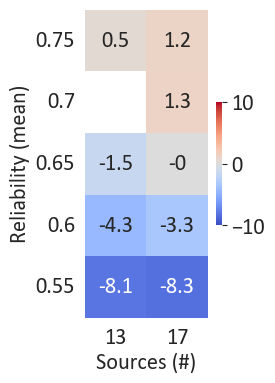

In [34]:
visualize_heatmap(outcome="accuracy")

<Axes: xlabel='Sources (#)', ylabel='Reliability (mean)'>

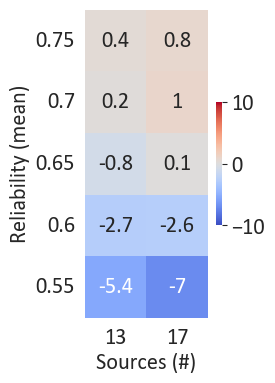

In [35]:
visualize_heatmap(outcome="pool_accuracy")

<Axes: xlabel='Sources (#)', ylabel='Reliability (mean)'>

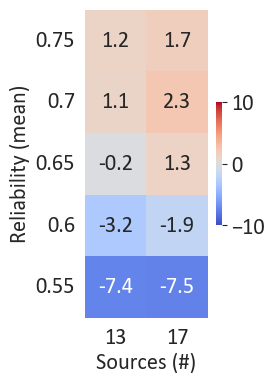

In [36]:
visualize_heatmap(outcome="bounded_pool_accuracy")

<Axes: xlabel='Sources (#)', ylabel='Reliability (mean)'>

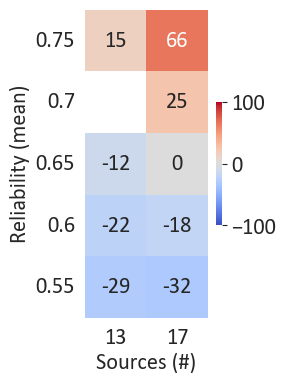

In [37]:
visualize_heatmap(outcome="accuracy", measure="relative")

<Axes: xlabel='Sources (#)', ylabel='Reliability (mean)'>

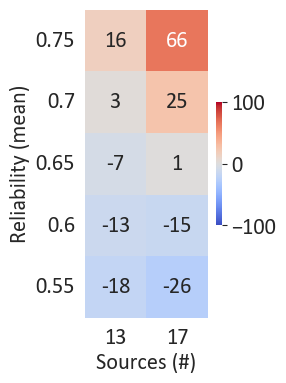

In [38]:
visualize_heatmap(outcome="pool_accuracy", measure="relative")

<Axes: xlabel='Sources (#)', ylabel='Reliability (mean)'>

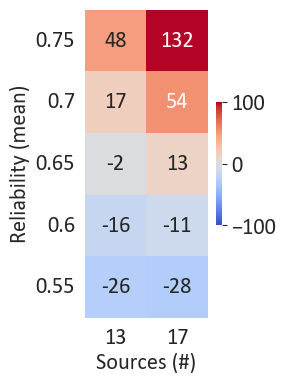

In [39]:
visualize_heatmap(outcome="bounded_pool_accuracy", measure="relative")

<Axes: xlabel='Sources (#)', ylabel='Reliability (mean)'>

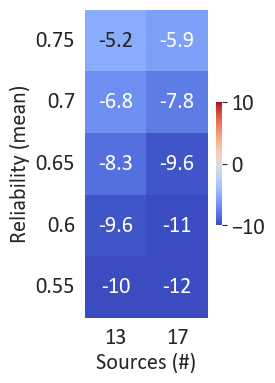

In [40]:
visualize_heatmap(outcome="average", measure="absolute")

# Explanations for the results

## Some examples

Numerical example with a few highly reliable and the others are randomizers

In [41]:
sources = Sources(18)
reliabilities = 0.50* np.ones(14) 
reliabilities = np.append(reliabilities, [0.9, 0.9, 0.9, 0.9])
sources.reliabilities = reliabilities
team_size = 3
e_team = expert_team(sources, 3, team_size)
d_team = diverse_team(sources, 3, team_size)
print(f"Expert team accuracy: {e_team.accuracy()}")
print(f"Diverse team accuracy: {d_team.accuracy()}")
print(f"Expert team pool accuracy: {e_team.pool_accuracy()}")
print(f"Diverse team pool accuracy: {d_team.pool_accuracy()}")
print(f"Expert team bounded pool accuracy: {e_team.bounded_pool_accuracy()}")
print(f"Diverse team bounded pool accuracy: {d_team.bounded_pool_accuracy()}")

Expert team accuracy: (0.9720000000000001, None)
Diverse team accuracy: (0.7000000000000024, None)
Expert team pool accuracy: 0.9720000000000001
Diverse team pool accuracy: 0.7187500000000026
Expert team bounded pool accuracy: 0.9720000000000001
Diverse team bounded pool accuracy: 0.7187500000000026


Numerical example where sources are approximately equally reliable.

In [42]:
sources = Sources(18)
reliabilities = 0.59* np.ones(14) 
reliabilities = np.append(reliabilities, 0.6 * np.ones(4))
sources.reliabilities = reliabilities
team_size = 3
e_team = expert_team(sources, 3, team_size)
d_team = diverse_team(sources, 3, team_size)
print(f"Expert team accuracy: {e_team.accuracy()}")
print(f"Diverse team accuracy: {d_team.accuracy()}")
print(f"Expert team pool accuracy: {e_team.pool_accuracy()}")
print(f"Diverse team pool accuracy: {d_team.pool_accuracy()}")
print(f"Expert team bounded pool accuracy: {e_team.bounded_pool_accuracy()}")
print(f"Diverse team bounded pool accuracy: {d_team.bounded_pool_accuracy()}")

Expert team accuracy: (0.6480000000000001, None)
Diverse team accuracy: (0.7022684591826573, None)
Expert team pool accuracy: 0.6480000000000001
Diverse team pool accuracy: 0.7193546739401214
Expert team bounded pool accuracy: 0.6480000000000001
Diverse team bounded pool accuracy: 0.7193546739401214


Defending the decision to consider reliability means of maximally 75%. Calculating the highest individual score for this setting. 

In [43]:
sources = Sources(21, reliability_distribution=("equidist", (0.65, 0.85)))
e_team = expert_team(sources, 5, 9)

for agent in e_team.members:
    print(f"Score: {agent.score}")

Score: 0.962686004
Score: 0.96154752
Score: 0.9604090359999999
Score: 0.9603541600000001
Score: 0.959270552
Score: 0.9591882379999999
Score: 0.9591046400000001
Score: 0.9581320680000001
Score: 0.9580223160000001


## Individual scores

In [19]:
from figures_scripts.individual_scores import df_individual_scores, boxplot_individual_scores

A visualization of the distribution of individual scores of all possible heuristics

Difficulty: 0.8029616073566253
Best agent: 0.8024929687499999
Team size: 6188


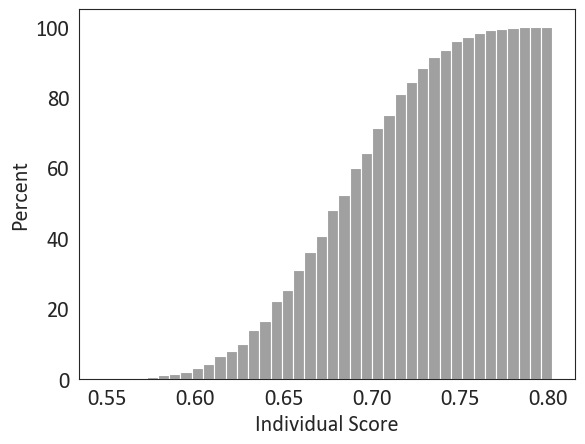

In [ ]:
from math import comb

n_sources = 17
sources = Sources(n_sources, reliability_distribution=("equidist", (0.50, 0.70)))

ranked_agents = expert_team(sources, 5, comb(n_sources, 5))

scores = np.array([agent.score for agent in ranked_agents.members])
fig = sns.histplot(scores, bins= 40, stat="percent", cumulative=True, color="gray")
fig.set_xlabel("Individual Score")

print(f"Difficulty: {sources.problem_difficulty()}")
best_agent = ranked_agents.members[0]
print(f"Best agent: {best_agent.score}")
print(f"Team size: {ranked_agents.size}")
# print(f"Team score: {ranked_agents.accuracy()}")

In [46]:
df_individual_scores()

,n_sources,rel_mean,mean,std,max,min
0,13.0,0.55,0.593368,0.041962,0.711170,0.468738
1,13.0,0.60,0.683028,0.039469,0.790432,0.562384
2,13.0,0.65,0.765496,0.035485,0.858625,0.653550
3,13.0,0.70,0.837739,0.030266,0.913674,0.738659
4,13.0,0.75,0.897398,0.024171,0.954478,0.814513
5,17.0,0.55,0.593301,0.043674,0.724930,0.453174
6,17.0,0.60,0.682898,0.041081,0.802493,0.546826
7,17.0,0.65,0.765311,0.036937,0.868592,0.638616
8,17.0,0.70,0.837512,0.031510,0.921302,0.724930
9,17.0,0.75,0.897145,0.025172,0.959710,0.802493


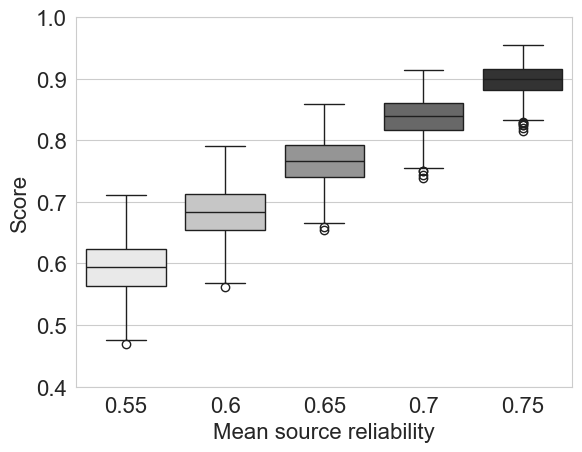

In [20]:
boxplot_individual_scores()

## Diversity and disagreement

In [48]:
from models.sources import Sources
from models.agent import Agent
from models.determine_teams import expert_team, diverse_team
from math import comb
import numpy as np
import pandas as pd
from utils.basic_functions import calculate_diversity, powerset
import utils.config as cfg

In [49]:
sources = Sources(13)
e_team = expert_team(sources, 5, 9)
d_team = diverse_team(sources, 5, 9)
e_diversities = [calculate_diversity(a.heuristic, b.heuristic) for a in e_team.members for b in e_team.members]
d_diversities = [calculate_diversity(a.heuristic, b.heuristic) for a in d_team.members for b in d_team.members]
print(f"Diversity gap for 13 sources {d_team.diversity() - e_team.diversity()}")

sources = Sources(17)
e_team = expert_team(sources, 5, 9)
d_team = diverse_team(sources, 5, 9)
e_diversities = [calculate_diversity(a.heuristic, b.heuristic) for a in e_team.members for b in e_team.members]
d_diversities = [calculate_diversity(a.heuristic, b.heuristic) for a in d_team.members for b in d_team.members]
print(f"Diversity gap for 17 sources {d_team.diversity() - e_team.diversity()}")



Diversity gap for 13 sources 0.40555555555555556
Diversity gap for 17 sources 0.5055555555555555


In [50]:
def likelihood_disagreement(agent1: Agent, agent2: Agent):
    sources = agent1.sources
    p_disagreement: float = 0
    sources_relevant = np.unique(agent1.heuristic + agent2.heuristic)
    
    for sources_positive in powerset(sources_relevant):
        for source in sources.sources:
            sources.set_valence(source, cfg.vote_for_negative)
        for source in sources_positive:
            sources.set_valence(source, cfg.vote_for_positive)
        agent1.update_opinion()
        agent2.update_opinion()
        if agent1.opinion != agent2.opinion:
            probabilities_list = [
                sources.reliabilities[source] for source in sources_positive
            ] + [
                1 - sources.reliabilities[source]
                for source in sources_relevant
                if source not in sources_positive
            ]
            probability_subset = np.prod(probabilities_list)
            p_disagreement += probability_subset            
    return p_disagreement

In [51]:
def calculate_expert_disagreement(n_sources, rel_mean):
    sources = Sources(n_sources, ("equi", (rel_mean - 0.1 , rel_mean + 0.1)))
    e_team = expert_team(sources, 5, 9)
    disagreements = [likelihood_disagreement(a, b) for a in e_team.members for b in e_team.members]
    return max(disagreements)
    

In [52]:
data = [
    [n_sources, rel_mean, calculate_expert_disagreement(n_sources, rel_mean)]
    for n_sources in [13, 17]
    for rel_mean in 0.55 + 0.05 * np.arange(5)
]
df = pd.DataFrame(data, columns=["n_sources", "rel_mean", "disagreement_rate"])
df


,n_sources,rel_mean,disagreement_rate
0,13,0.55,0.247400
1,13,0.60,0.210279
2,13,0.65,0.164766
3,13,0.70,0.116473
4,13,0.75,0.071405
5,17,0.55,0.239819
6,17,0.60,0.200227
7,17,0.65,0.153578
8,17,0.70,0.105629
9,17,0.75,0.062307


## Expert team versus best-performing individual

In [53]:
from data_analysis.expert_team_vs_individual import produce_df_expert_team_individual

In [54]:
produce_df_expert_team_individual(outcome="accuracy")

,n_sources,rel_mean,difference,error_reduction
0,13,0.55,-0.007,-2
1,13,0.60,-0.013,-6
2,13,0.65,-0.015,-12
3,13,0.70,-0.014,-20
4,13,0.75,-0.011,-30
5,17,0.55,-0.011,-4
6,17,0.60,-0.016,-9
7,17,0.65,-0.017,-15
8,17,0.70,-0.015,-23
9,17,0.75,-0.010,-34


In [55]:
produce_df_expert_team_individual(outcome="bounded_pool_accuracy")

,n_sources,rel_mean,difference,error_reduction
0,13,0.55,-0.007,-2
1,13,0.60,-0.012,-6
2,13,0.65,-0.015,-12
3,13,0.70,-0.014,-19
4,13,0.75,-0.010,-29
5,17,0.55,-0.011,-4
6,17,0.60,-0.015,-8
7,17,0.65,-0.016,-14
8,17,0.70,-0.014,-22
9,17,0.75,-0.010,-32


## Overcounting: Boundedly rational evidence-based dynamics

In [56]:
from models.determine_teams import expert_team, diverse_team

sources = Sources(17)
e_team = expert_team(sources, 5, 9)

expert_coverage, expert_weights = np.unique([agent.heuristic for agent in e_team.members], return_counts=True)
dict(zip(expert_coverage, expert_weights))


{8: 1, 9: 2, 10: 2, 11: 3, 12: 5, 13: 6, 14: 8, 15: 9, 16: 9}

In [57]:
d_team = diverse_team(sources, 5, 9)

coverage, weights = np.unique([agent.heuristic for agent in d_team.members], return_counts=True)
dict(zip(coverage, weights))

# for k in a:
#     print(k)

{0: 2,
 1: 3,
 2: 2,
 3: 2,
 4: 3,
 5: 2,
 6: 2,
 7: 3,
 8: 3,
 9: 2,
 10: 3,
 11: 3,
 12: 3,
 13: 3,
 14: 3,
 15: 3,
 16: 3}